In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_scores = pd.read_csv("Test scores.csv", parse_dates=['Test taken date'])
test_master = pd.read_csv("Test master.csv")
test_participant = pd.read_csv("Audience summary.csv")

In [3]:
test_scores['weekday_name']  = test_scores['Test taken date'].dt.weekday_name
test_scores['month']  = test_scores['Test taken date'].dt.month_name() 
test_scores['week']  = test_scores['Test taken date'].dt.week-42 # to get number from 1 
test_master['maximum_score'] = test_master['No. of questions'] * test_master['Marks per question']

In [4]:
test_scores = pd.merge(test_scores,test_master,left_on="Test Name", right_on="Test name", how = "left")

In [5]:
cols = ['Participant identifier', 'Test Name', 'Track','Designation', 'Score', 'Test taken date',
        'weekday_name', 'month', 'week','Complexity', 'maximum_score']
test_scores = test_scores[cols]

In [6]:
test_scores['Percent'] = round((test_scores['Score']/test_scores['maximum_score'])*100,2)

In [7]:
test_score_weekday = test_scores.groupby(['month','weekday_name']).size().reset_index(name='count')

Text(0.5, 1.05, 'Number of participation by track and designation during the event')

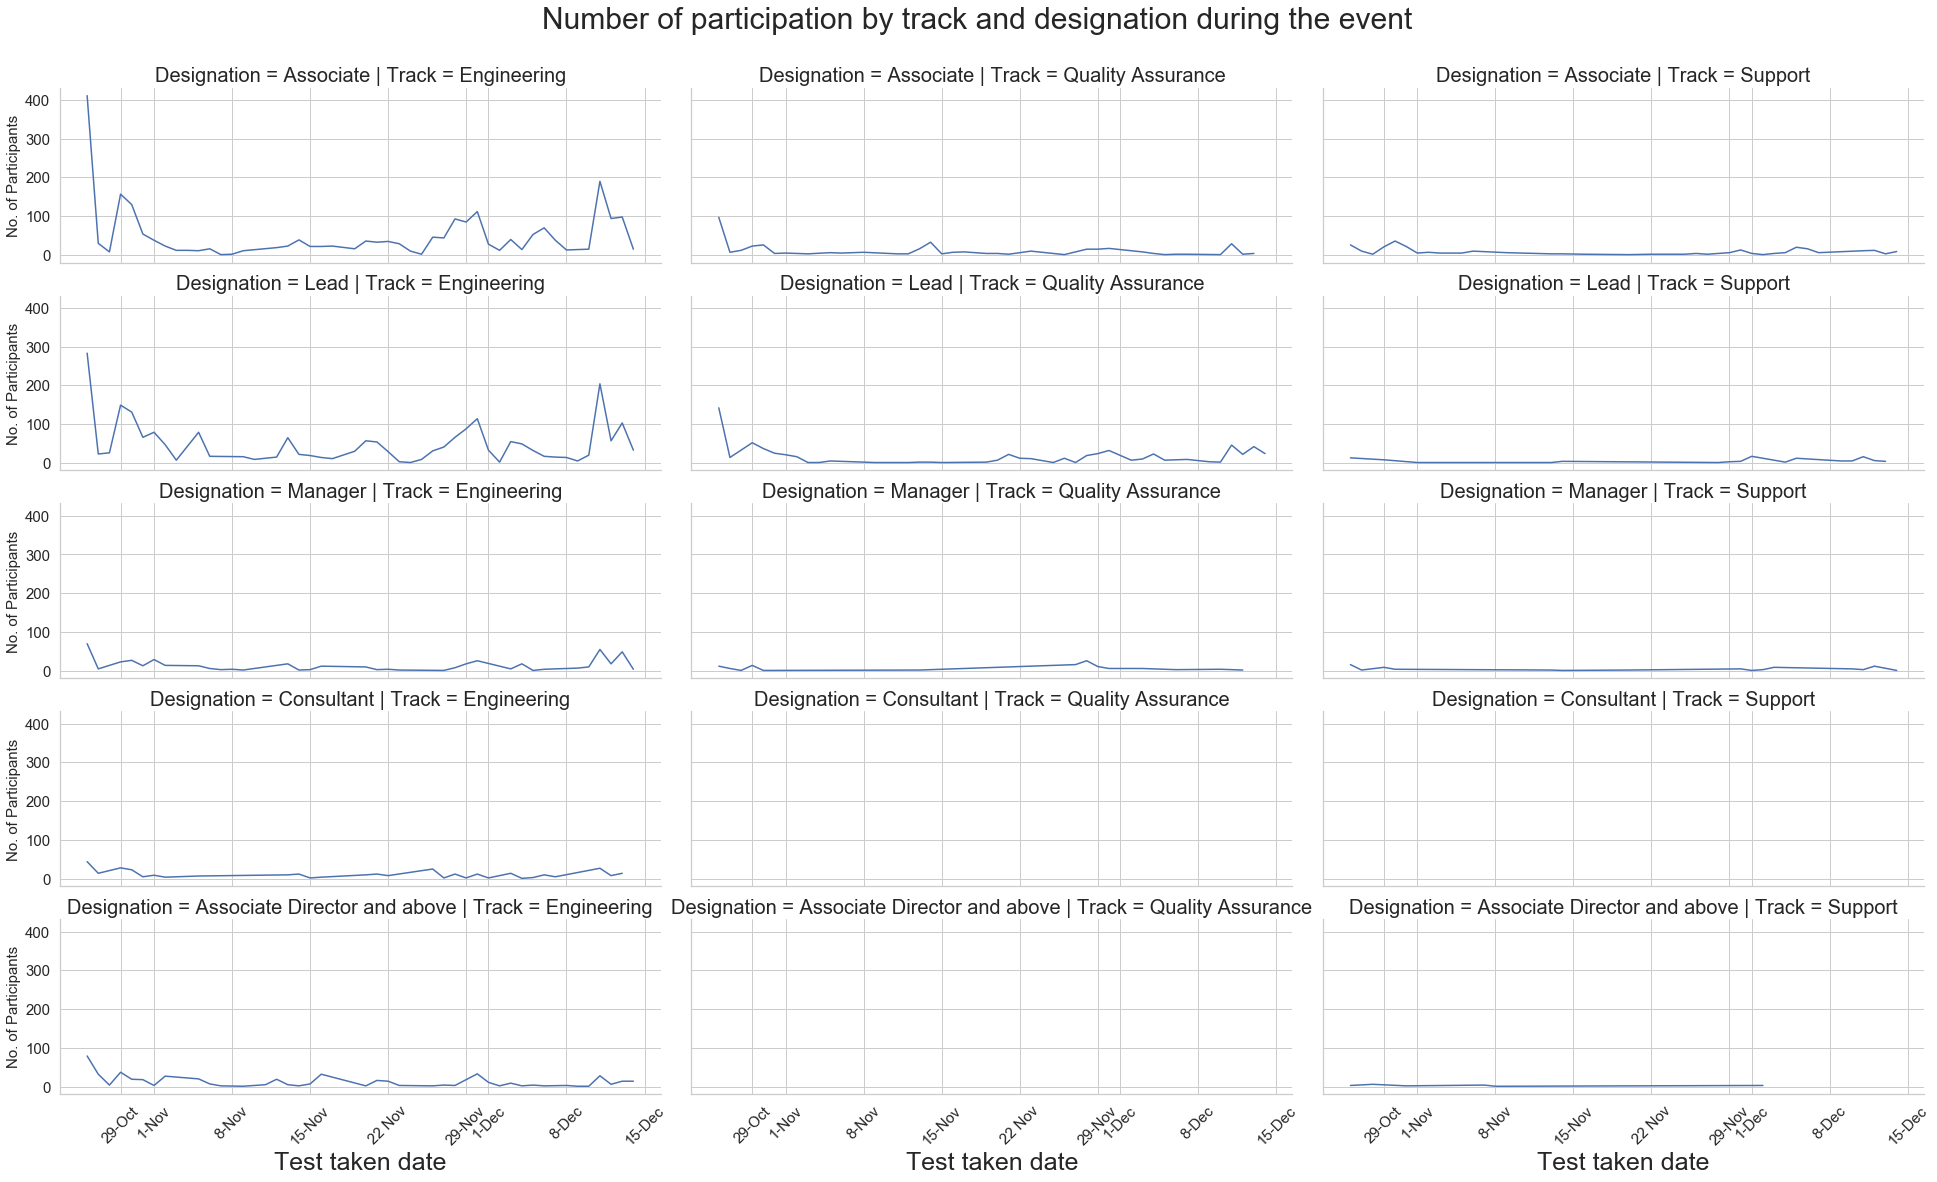

In [8]:
taken_date = test_scores.groupby(['Test taken date','Track','Designation'])['Participant identifier'].size().reset_index()
sns.set(style="whitegrid")
g = sns.relplot(y = 'Participant identifier', x = 'Test taken date', data = taken_date,
              row="Designation",  col = "Track", height = 3, aspect =3,
                     row_order = ['Associate',  'Lead','Manager','Consultant','Associate Director and above'],
            kind="line", legend="full")

g.set_titles(size =20)
g.set_xlabels(size = 25)
g.set_ylabels(size = 15, label = 'No. of Participants')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =15, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =45)
g.fig.suptitle('Number of participation by track and designation during the event', fontsize=30, x = 0.5, y = 1.05)
#plb.savefig('Participation_Track_Design',dpi=100,bbox_inches='tight')


Text(0.5, 1.05, 'Participants proportion from respective headcount by track and designation during the event')

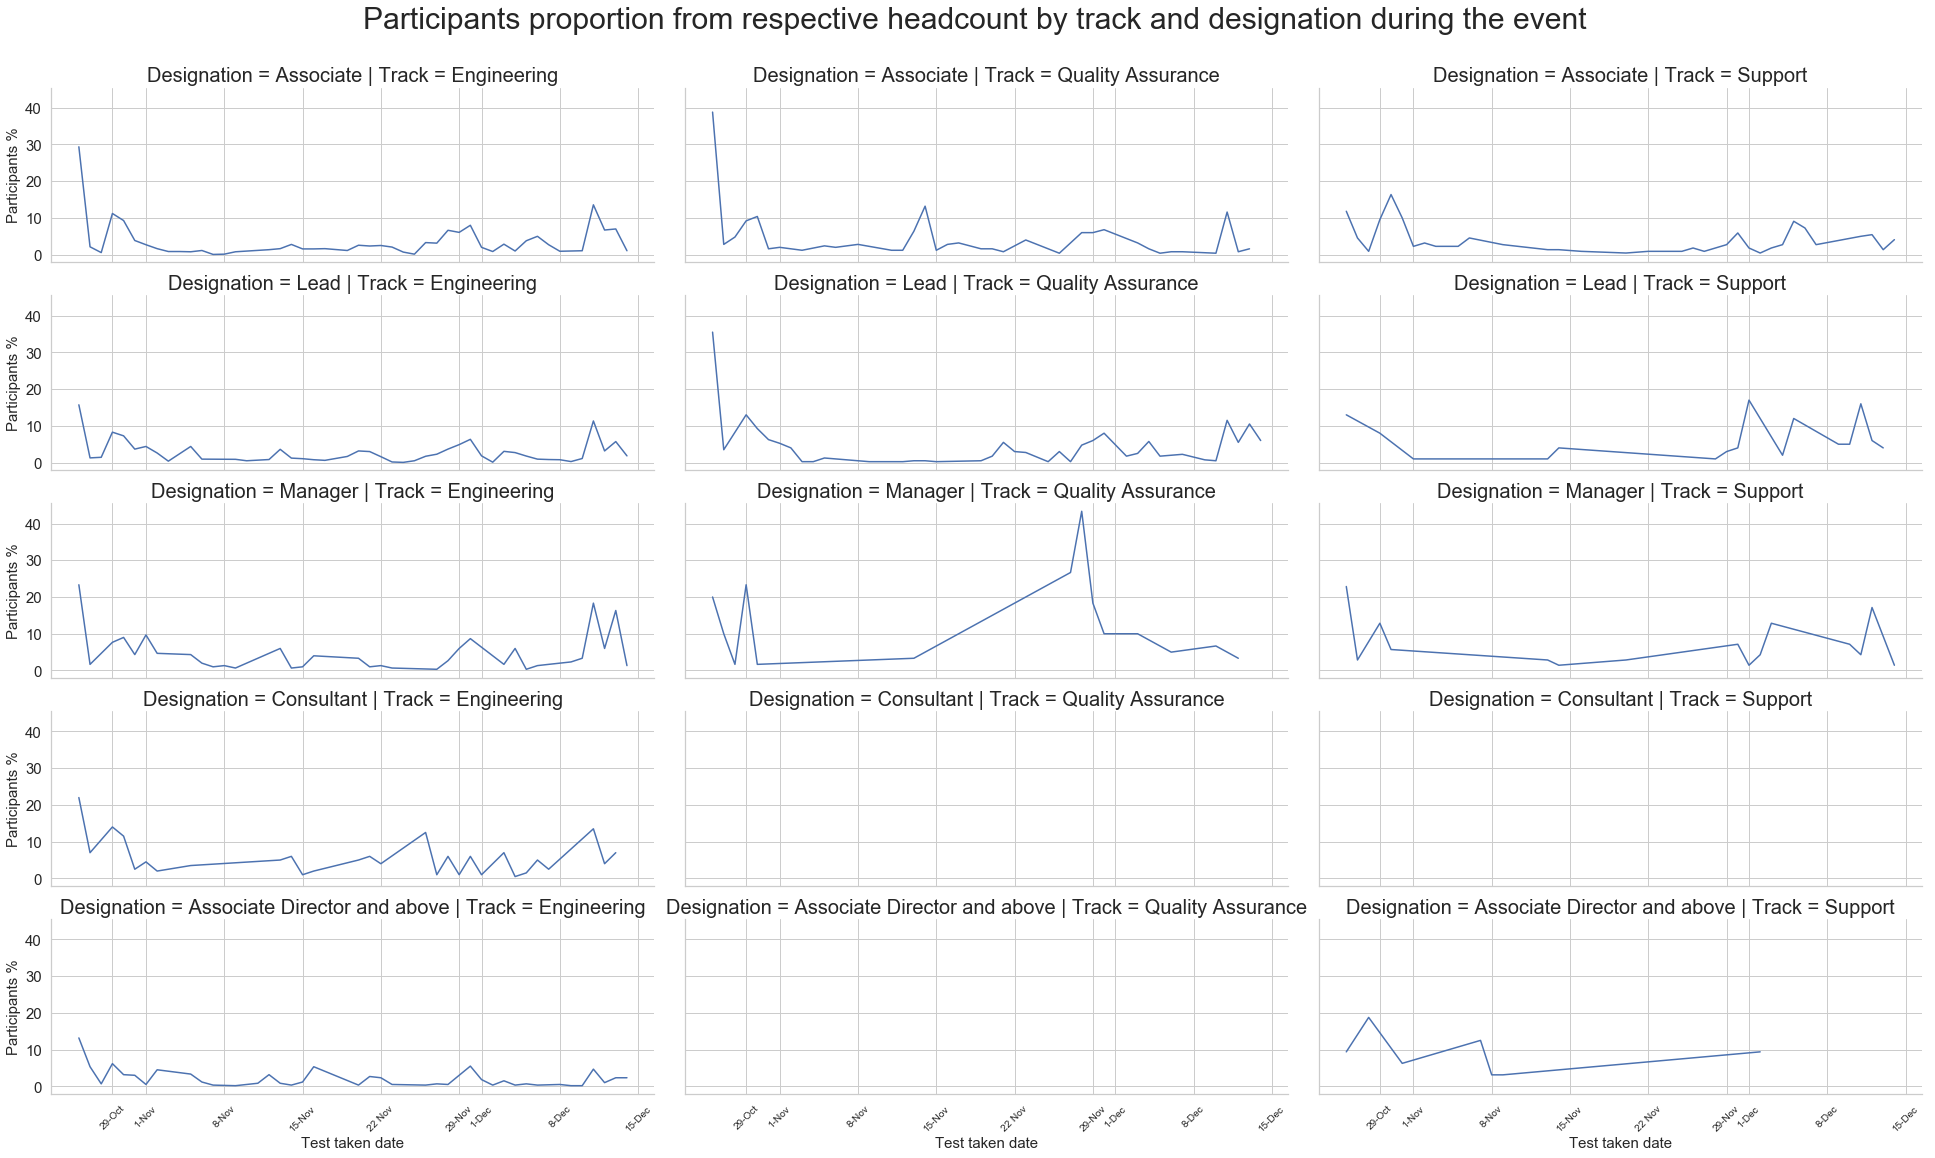

In [9]:
company_headcount = pd.melt(test_participant, id_vars=['Designation'], value_vars=['Engineering', 'Quality Assurance', 'Support']) \
                        .rename(columns={"variable": "Track", "value": "Headcount"})

taken_date_overall = test_scores.groupby(['Test taken date','Track','Designation'])['Participant identifier'].size().reset_index()
taken_date_overall = taken_date_overall.merge(left_on=['Designation','Track'],right_on=['Designation','Track'], 
                                              right = company_headcount, how='left')

taken_date_overall['Percent'] = round(taken_date_overall['Participant identifier']/taken_date_overall['Headcount'],4)*100

sns.set(style="whitegrid")
g = sns.relplot(y = 'Percent', x = 'Test taken date', data = taken_date_overall,
              row="Designation",  col = "Track", height = 3, aspect =3,
                     row_order = ['Associate',  'Lead','Manager','Consultant','Associate Director and above'],
            kind="line", legend="full")

g.set_titles(size =20)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15, label = 'Participants %')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =10
, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =45)
g.fig.suptitle('Participants proportion from respective headcount by track and designation during the event', fontsize=30, x = 0.5, y = 1.05)

#plb.savefig('Percent_Part_Track_Design',dpi=100,bbox_inches='tight')


Text(0.5, 1.1, 'No. of participation from each track during the event')

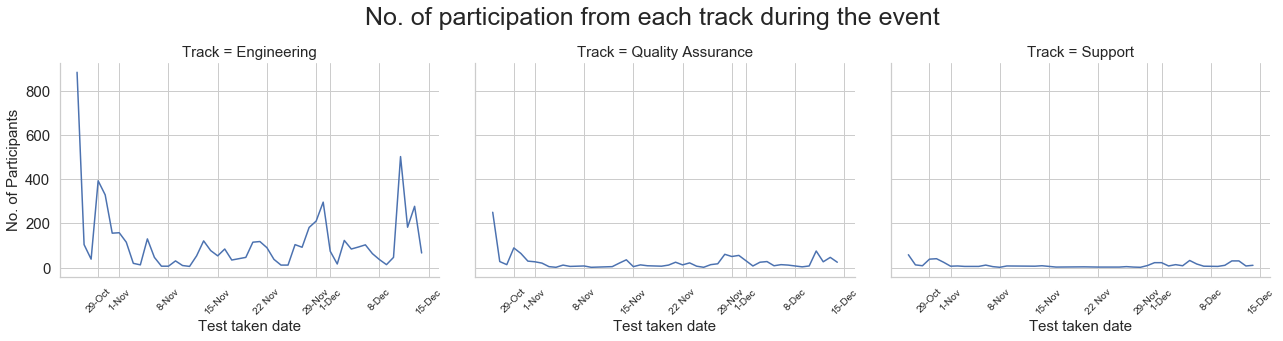

In [10]:
taken_date = test_scores.groupby(['Test taken date','Track'])['Participant identifier'].size().reset_index()
sns.set(style="whitegrid")
g = sns.relplot(y = 'Participant identifier', x = 'Test taken date', data = taken_date,
                col = "Track", height = 4, aspect =1.5,
            kind="line", legend="full")

g.set_titles(size =15)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15, label = 'No. of Participants')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =10
, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =45)
g.fig.suptitle('No. of participation from each track during the event', fontsize=25, x = 0.5, y = 1.1)
#plb.savefig('Participation_Track',dpi=100,bbox_inches='tight')

Text(0.5, 1.1, 'Participants proportion from respective headcount by track during the event')

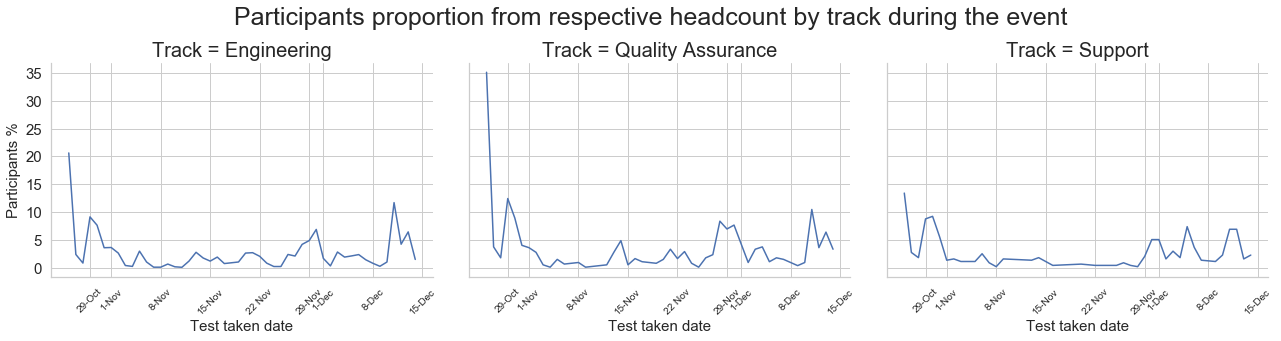

In [11]:
headcount_track = company_headcount.groupby(['Track'])['Headcount'].sum().reset_index()
taken_date_track = test_scores.groupby(['Test taken date','Track'])['Participant identifier'].size().reset_index()
taken_date_track = taken_date_track.merge(left_on='Track',right_on='Track', right = headcount_track, how='left')
taken_date_track['Percent'] = round(taken_date_track['Participant identifier']/taken_date_track['Headcount'],4)*100

sns.set(style="whitegrid")
g = sns.relplot(y = 'Percent', x = 'Test taken date', data = taken_date_track,
                col = "Track", height = 4, aspect =1.5,
            kind="line", legend="full")

g.set_titles(size =20)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15, label = 'Participants %')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =10
, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =45)
g.fig.suptitle('Participants proportion from respective headcount by track during the event', fontsize=25, x = 0.5, y = 1.1)##
#plb.savefig('Percent_Part_Track',dpi=100,bbox_inches='tight')

Text(0.5, 1.1, 'No. of participation from each designation during the event')

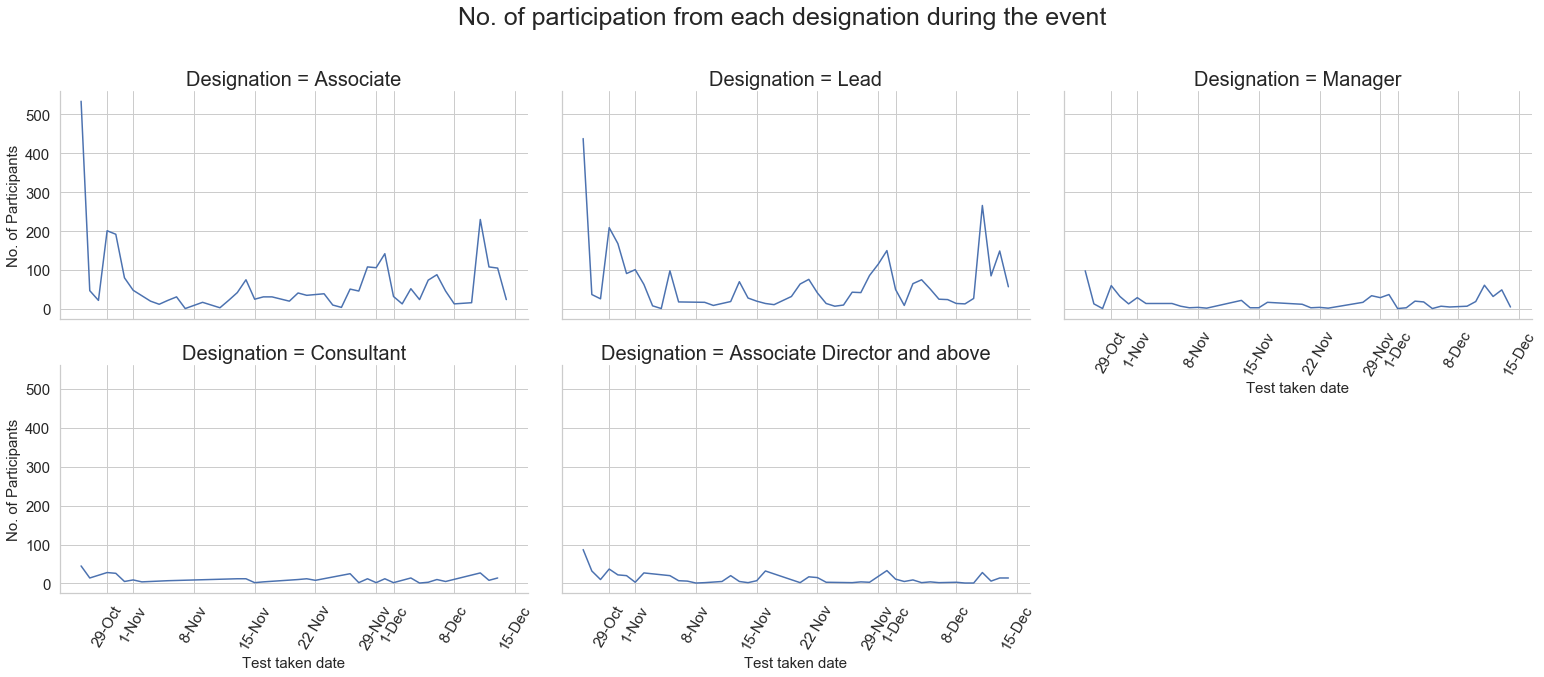

In [12]:

taken_date = test_scores.groupby(['Test taken date','Designation'])['Participant identifier'].size().reset_index()
sns.set(style="whitegrid")
g = sns.relplot(y = 'Participant identifier', x = 'Test taken date', data = taken_date,
                col = "Designation", height = 4, aspect =1.8, col_wrap =3,
            kind="line", legend="full",
                    col_order = ['Associate',  'Lead','Manager','Consultant','Associate Director and above'])

g.set_titles(size =20)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15,label = 'No. of Participants')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =15, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =60)
g.fig.suptitle('No. of participation from each designation during the event', fontsize=25, x = 0.5, y = 1.1)
#plb.savefig('Participation_Designation',dpi=100,bbox_inches='tight')

Text(0.5, 1.05, 'Participants proportion from respective headcount by designation during the event')

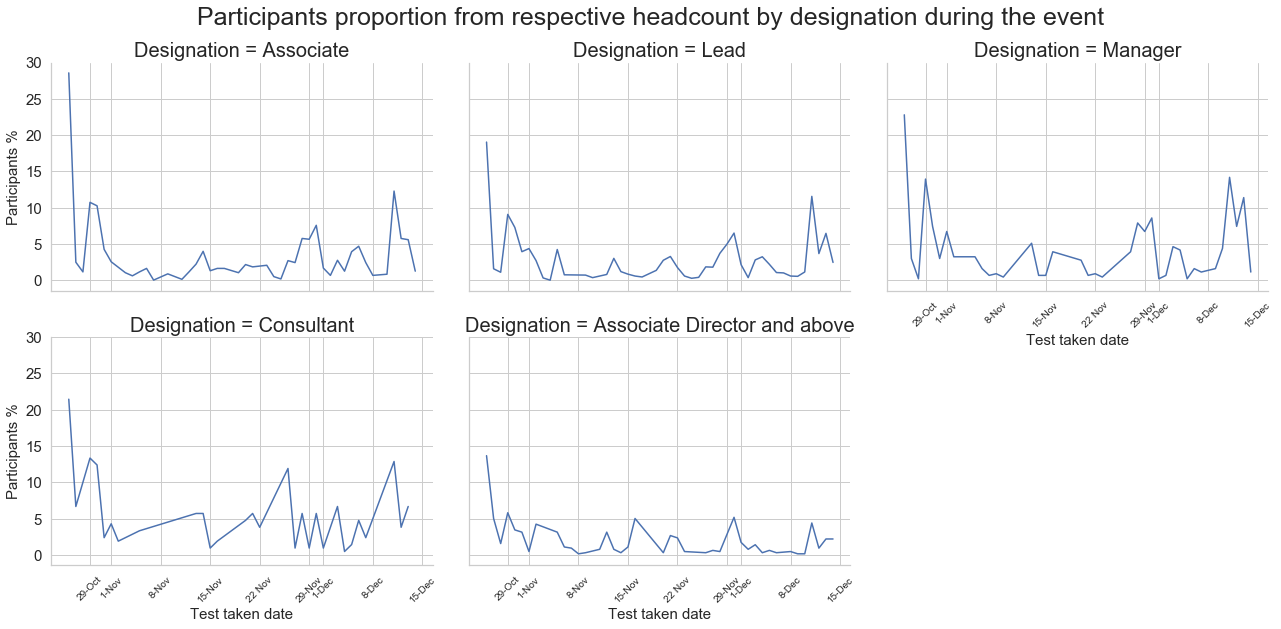

In [13]:
headcount_designation = company_headcount.groupby(['Designation'])['Headcount'].sum().reset_index()
taken_date_designation = test_scores.groupby(['Test taken date','Designation'])['Participant identifier'].size().reset_index()
taken_date_designation = taken_date_designation.merge(left_on='Designation',right_on='Designation', right = headcount_designation, how='left')
taken_date_designation['Percent'] = round(taken_date_designation['Participant identifier']/taken_date_designation['Headcount'],4)*100
sns.set(style="whitegrid")
g = sns.relplot(y = 'Percent', x = 'Test taken date', data = taken_date_designation,
                col = "Designation", height = 4, aspect =1.5,col_wrap =3,
                col_order = ['Associate',  'Lead','Manager','Consultant','Associate Director and above'],
            kind="line", legend="full")

g.set_titles(size =20)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15, label = 'Participants %')
g.set_yticklabels(fontsize =15)
g.set_xticklabels(fontsize =10
, labels = ['29-Oct','1-Nov','8-Nov','15-Nov', '22 Nov', '29-Nov', '1-Dec','8-Dec','15-Dec'],
                  rotation =45)
g.fig.suptitle('Participants proportion from respective headcount by designation during the event', fontsize=25, x = 0.5, y = 1.05)
#plb.savefig('Percent_Part_Design',dpi=100,bbox_inches='tight')

Text(0.5, 1.1, 'Participants (in proportion and number) from \nrespective headcount by designation during the weeks')

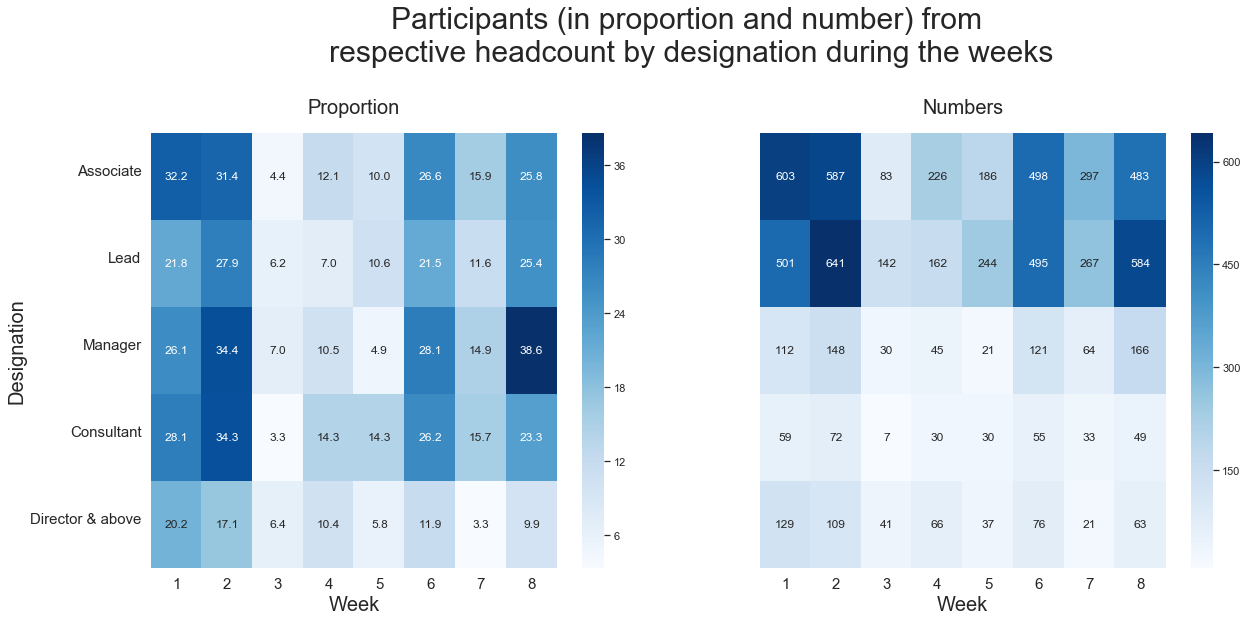

In [14]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
taken_date_designation_week = test_scores.groupby(['week','Designation'])['Participant identifier'].size().reset_index()
taken_date_designation_week = taken_date_designation_week.merge(left_on='Designation',right_on='Designation', right = headcount_designation, how='left')
taken_date_designation_week['Percent'] = round(taken_date_designation_week['Participant identifier']/taken_date_designation_week['Headcount'],4)*100
df_heatmap = taken_date_designation_week.pivot('Designation','week','Percent')
df_heatmap = df_heatmap.reindex(['Associate',  'Lead','Manager','Consultant','Associate Director and above'])
g = sns.heatmap(df_heatmap, annot=True,fmt='.1f',cmap= "Blues", ax=ax1)
g.set_xlabel(xlabel = 'Week',fontsize=20)
g.set_ylabel(ylabel = 'Designation',fontsize=20)
g.set_yticklabels(labels = ['Associate',  'Lead','Manager','Consultant','Director & above'], fontsize=15, rotation = 360, wrap = True)
g.set_xticklabels(labels = [1,2,3,4,5,6,7,8], fontsize=15)
g.set_title('Proportion', fontsize=20,pad=20)


test_scores_week = test_scores.groupby(['week','Designation'])[['Participant identifier']].size().reset_index(name = 'count')
df_heatmap = test_scores_week.pivot('Designation','week','count')
df_heatmap = df_heatmap.reindex(['Associate',  'Lead','Manager','Consultant','Associate Director and above'])


f = sns.heatmap(df_heatmap, annot=True,fmt='d',cmap= "Blues", ax =ax2)
f.set_xlabel(xlabel = 'Week',fontsize=20)
f.set_ylabel(ylabel = '',fontsize=20)
f.set_yticklabels(labels = '', fontsize=15, rotation = 360, wrap = True)
f.set_xticklabels(labels = [1,2,3,4,5,6,7,8], fontsize=15)
f.set_title('Numbers', fontsize=20,pad=20)



fig.suptitle('Participants (in proportion and number) from \nrespective headcount by designation during the weeks', 
             fontsize=30, x = 0.5, y = 1.1)
#plb.savefig('PNW_Track',dpi=100,bbox_inches='tight')


In [15]:
taken_date_designation_week

,week,Designation,Participant identifier,Headcount,Percent
0,1,Associate,603,1870.0,32.25
1,1,Associate Director and above,129,637.0,20.25
2,1,Consultant,59,210.0,28.10
3,1,Lead,501,2300.0,21.78
4,1,Manager,112,430.0,26.05
5,2,Associate,587,1870.0,31.39
6,2,Associate Director and above,109,637.0,17.11
7,2,Consultant,72,210.0,34.29
8,2,Lead,641,2300.0,27.87
9,2,Manager,148,430.0,34.42


Text(0.5, 1.1, 'Participants (in proportion and number) from \nrespective headcount by designation during the weekdays')

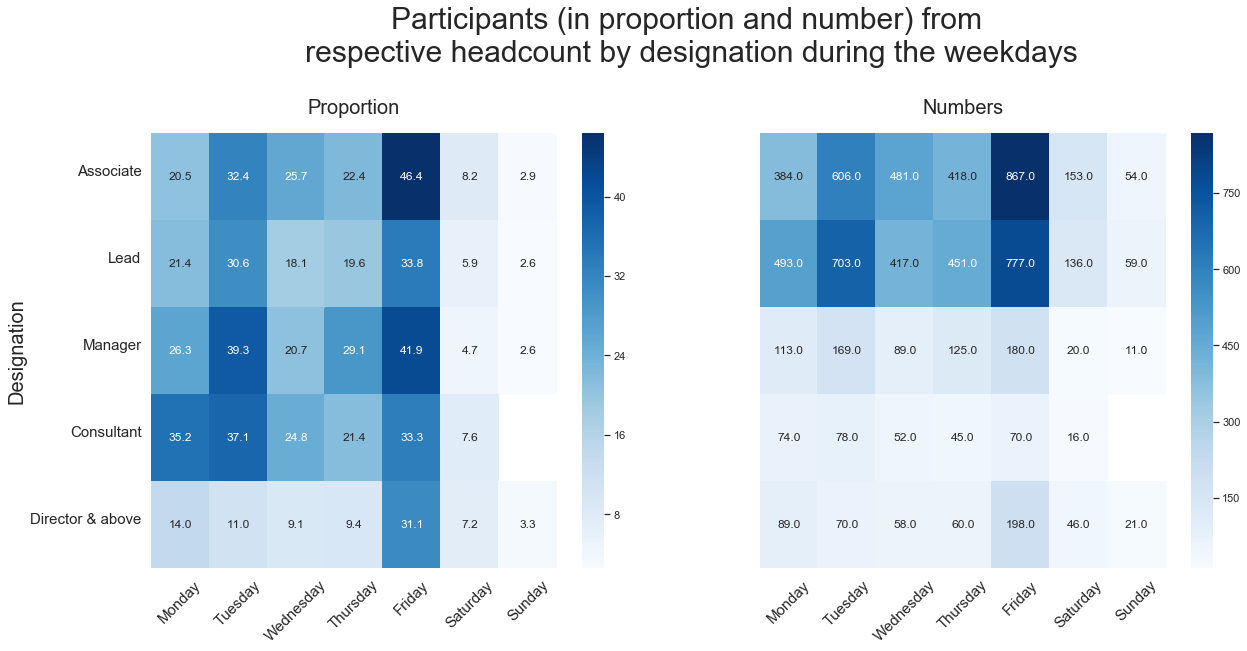

In [16]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
taken_date_designation_weekday_name = test_scores.groupby(['weekday_name','Designation'])['Participant identifier'].size().reset_index()
taken_date_designation_weekday_name = taken_date_designation_weekday_name.merge(left_on='Designation',right_on='Designation', right = headcount_designation, how='left')
taken_date_designation_weekday_name['Percent'] = round(taken_date_designation_weekday_name['Participant identifier']/taken_date_designation_weekday_name['Headcount'],4)*100
df_heatmap = taken_date_designation_weekday_name.pivot('Designation','weekday_name','Percent')
df_heatmap = df_heatmap.reindex(['Associate',  'Lead','Manager','Consultant','Associate Director and above'])
df_heatmap = df_heatmap[['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']]
g = sns.heatmap(df_heatmap, annot=True,fmt='.1f',cmap= "Blues", ax=ax1)
g.set_xlabel(xlabel = '',fontsize=20)
g.set_ylabel(ylabel = 'Designation',fontsize=20)
g.set_yticklabels(labels = ['Associate',  'Lead','Manager','Consultant','Director & above'], fontsize=15, rotation = 360, wrap = True)
g.set_xticklabels(labels = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday','Saturday', 'Sunday'], fontsize=15, rotation = 45)
g.set_title('Proportion', fontsize=20,pad=20)


test_scores_weekday_name = test_scores.groupby(['weekday_name','Designation'])[['Participant identifier']].size().reset_index(name = 'count')
df_heatmap = test_scores_weekday_name.pivot('Designation','weekday_name','count')
df_heatmap = df_heatmap.reindex(['Associate',  'Lead','Manager','Consultant','Associate Director and above'])
df_heatmap = df_heatmap[['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']]
f = sns.heatmap(df_heatmap, annot=True,fmt='0.1f',cmap= "Blues", ax =ax2)
f.set_xlabel(xlabel = '',fontsize=20)
f.set_ylabel(ylabel = '',fontsize=20)
f.set_yticklabels(labels = '', fontsize=15, rotation = 360, wrap = True)
f.set_xticklabels(labels = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday','Saturday', 'Sunday'], fontsize=15, rotation =45)
f.set_title('Numbers', fontsize=20,pad=20)



fig.suptitle('Participants (in proportion and number) from \nrespective headcount by designation during the weekdays', 
             fontsize=30, x = 0.5, y = 1.1)
#plb.savefig('PNWD_Track',dpi=100,bbox_inches='tight')


Text(0.5, 1.03, 'Participants (in proportion and number) from \nrespective headcount by track during the weeks')

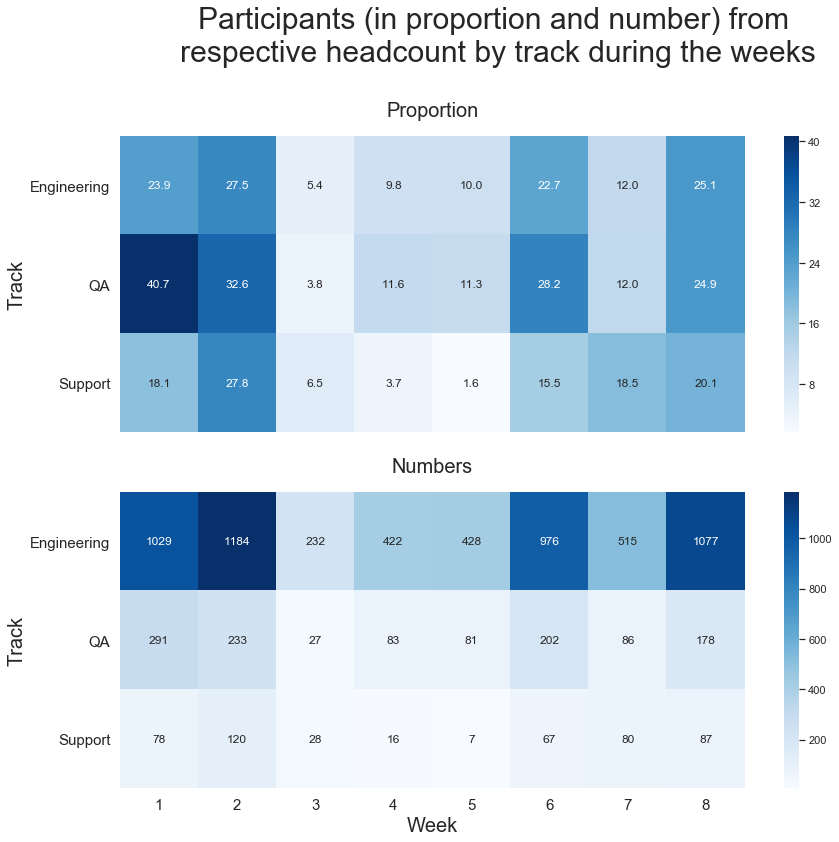

In [17]:
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

taken_date_track_week = test_scores.groupby(['week','Track'])['Participant identifier'].size().reset_index()
taken_date_track_week = taken_date_track_week.merge(left_on='Track',right_on='Track', right = headcount_track, how='left')
taken_date_track_week['Percent'] = round(taken_date_track_week['Participant identifier']/taken_date_track_week['Headcount'],4)*100
df_heatmap = taken_date_track_week.pivot('Track','week','Percent')

g = sns.heatmap(df_heatmap, annot=True,fmt='.1f',cmap= "Blues", ax = ax1)

g.set_xlabel(xlabel = '',fontsize=20)
g.set_ylabel(ylabel = 'Track',fontsize=20)
g.set_yticklabels(labels = ['Engineering', "QA", "Support"], fontsize=15, rotation = 360)
g.set_xticklabels(labels = '', fontsize=15)
g.set_title('Proportion', fontsize=20,pad=20)


test_scores_week = test_scores.groupby(['week','Track'])[['Participant identifier']].size().reset_index(name = 'count')
df_heatmap = test_scores_week.pivot('Track','week','count')
f = sns.heatmap(df_heatmap, annot=True,fmt='d',cmap= "Blues", ax = ax2)
f.set_xlabel(xlabel = 'Week',fontsize=20)
f.set_ylabel(ylabel = 'Track',fontsize=20)
f.set_yticklabels(labels = ['Engineering', "QA", "Support"], fontsize=15, rotation = 360)
f.set_xticklabels(labels = [1,2,3,4,5,6,7,8], fontsize=15)
f.set_title('Numbers', fontsize=20,pad=20)


fig.suptitle('Participants (in proportion and number) from \nrespective headcount by track during the weeks', 
             fontsize=30, x = 0.5, y = 1.03)
#plb.savefig('PNW_Design',dpi=100,bbox_inches='tight')



Text(0.5, 1.03, 'Participants (in proportion and number) from \nrespective headcount by track during the weekdays')

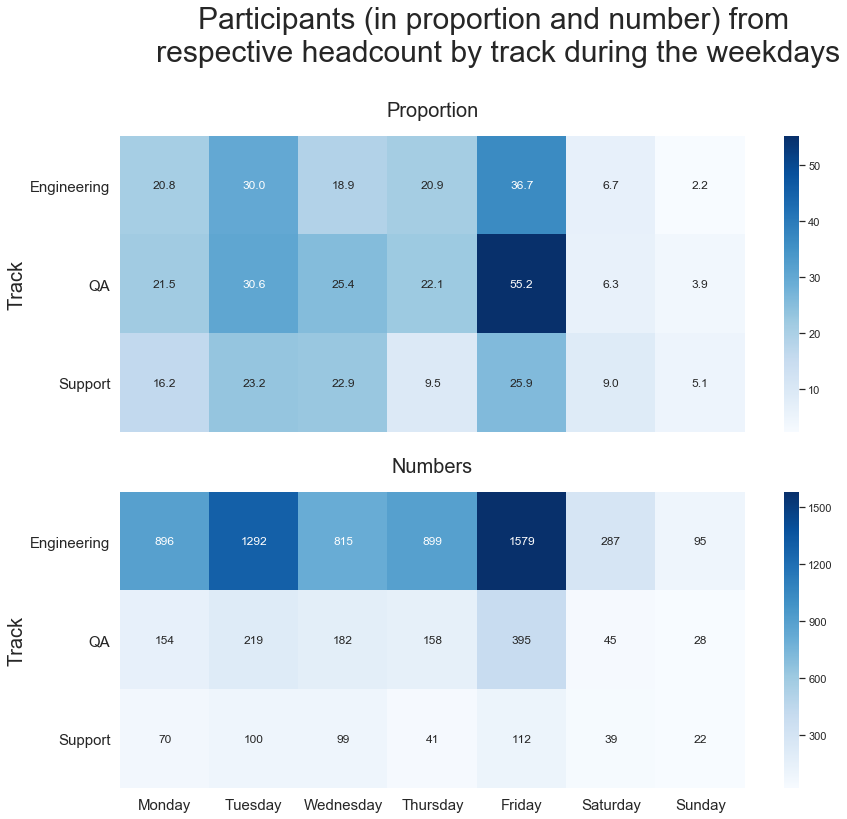

In [18]:
fig = plt.figure(figsize=(14,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

taken_date_track_weekday_name = test_scores.groupby(['weekday_name','Track'])['Participant identifier'].size().reset_index()
taken_date_track_weekday_name = taken_date_track_weekday_name.merge(left_on='Track',right_on='Track', right = headcount_track, how='left')
taken_date_track_weekday_name['Percent'] = round(taken_date_track_weekday_name['Participant identifier']/taken_date_track_weekday_name['Headcount'],4)*100
df_heatmap = taken_date_track_weekday_name.pivot('Track','weekday_name','Percent')
df_heatmap = df_heatmap[['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']]
g = sns.heatmap(df_heatmap, annot=True,fmt='.1f',cmap= "Blues", ax = ax1)

g.set_xlabel(xlabel = '',fontsize=20)
g.set_ylabel(ylabel = 'Track',fontsize=20)
g.set_yticklabels(labels = ['Engineering', "QA", "Support"], fontsize=15, rotation = 360)
g.set_xticklabels(labels = '', fontsize=15)
g.set_title('Proportion', fontsize=20,pad=20)


test_scores_weekday_name = test_scores.groupby(['weekday_name','Track'])[['Participant identifier']].size().reset_index(name = 'count')
df_heatmap = test_scores_weekday_name.pivot('Track','weekday_name','count')
df_heatmap = df_heatmap[['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']]
f = sns.heatmap(df_heatmap, annot=True,fmt='d',cmap= "Blues", ax = ax2)
f.set_xlabel(xlabel = '',fontsize=20)
f.set_ylabel(ylabel = 'Track',fontsize=20)
f.set_yticklabels(labels = ['Engineering', "QA", "Support"], fontsize=15, rotation = 360)
f.set_xticklabels(labels = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday','Saturday', 'Sunday'], fontsize=15)
f.set_title('Numbers', fontsize=20,pad=20)


fig.suptitle('Participants (in proportion and number) from \nrespective headcount by track during the weekdays', 
             fontsize=30, x = 0.5, y = 1.03)
#plb.savefig('PNWD_Design',dpi=100,bbox_inches='tight')

